<a href="https://colab.research.google.com/github/sharmarahulraj03/NLP_Tasks/blob/main/Assignment_2_Part_B_DTI5125_Rahul_Raj_Sharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1 align="center"><b>Data Science Applications</b></H1>
<H3 align="center"><b>Assignment 2</b></H3>
<H5 align="left"><b><u> Overview:</u></b></H5>
<p align="justify">Assignment 2 focuses on the application of classification and clustering techniques to textual documents. The
assignment should be completed individually using either Python or R. Upon completion, present your result in one submission, including the answers generated or plots. Also, submit the source codes used to generate your results asa separate attachment.<br>
This assignment is in two parts; Part A involves exploratory analysis and normalization of the given text data, followed by a comparison of classification techniques. Part B involves the use of clustering techniques to group similar observations into clusters, and extract insight from the unstructured data provided.
.</p>
<H5 align="left"><b><u>Part B: Clustering (50 points)</u></b></H5>
<p align="justify">
<ol>
<li>Given the table below containing the distance measures of the following vectors, answer the following:
<ol>a) Draw a dendrogram that clearly shows the order in which the points are merged (5 points)<br>
b) How many sets of cluster can you deduced from the dendrogram? (5 points)</ol>
</li>
<br>
<li>You are hereby provided with dataset scrapped from Reuters News headlines from June 1st - June 30th 2020.Complete the following: (40 points)
</li>
<ol>a) Clean, tokenize and stem/lemmatize the data <br>
b) Covert the word corpus to vector space using tfidf vectorizer <br>
c) Derive the cosine similarity and generate the distance matrix <br>
d) Determine the optimal cluster using the elbow method, and generate clusters using KMeans and Hierarchical clustering techniques <br>
e) Provide a visualization of the generated clusters from the KMeans & Hierarchical clustering</ol>
</ol></p>

**Importing all the required Libraries**

In [ ]:
import nltk
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1. Given the table below containing the distance measures of the following vectors, answer the following: <br>
a) Draw a dendrogram that clearly shows the order in which the points are merged (5 points)**

In [ ]:
#Creating matrix from the given distance in the table
matrix_for_dendrogram = np.array([[0.00,0.90,0.59,0.45,0.65], [0.90,0.00, 0.36,0.53,0.02], [0.59,0.36,0.00,0.56,0.15], [0.45,0.53,0.56,0.00,0.24], [0.65,0.02,0.15,0.24,0.00]])

In [ ]:
#Display matrix
matrix_for_dendrogram

array([[0.  , 0.9 , 0.59, 0.45, 0.65],
       [0.9 , 0.  , 0.36, 0.53, 0.02],
       [0.59, 0.36, 0.  , 0.56, 0.15],
       [0.45, 0.53, 0.56, 0.  , 0.24],
       [0.65, 0.02, 0.15, 0.24, 0.  ]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


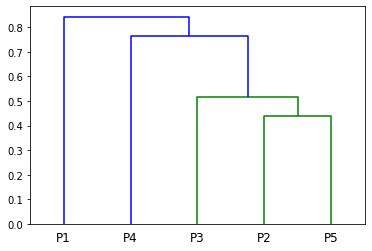

In [ ]:
#Creating Dendrogram 
linkage_matrix = linkage(matrix_for_dendrogram, "single")
dendrogram(linkage_matrix, labels=["P1", "P2", "P3", "P4", "P5"]) 
plt.show()

**b) How many sets of cluster can you deduced from the dendrogram? (5 points)**

**Ans:** There are 2 clusters developed in above shown dendrogram

---------------------------------------------


**2. You are hereby provided with dataset scrapped from Reuters News headlines from June 1st - June 30th 2020.Complete the following: (40 points)**

In [ ]:
#Reading the news data 
news_data = pd.read_csv("reuters_news_headlines.csv")
news_data.head(10)

,Date,Headlines,Description
0,2020-06-30,Google postpones U.S. office reopening to Sept...,Alphabet Inc's Google said late on Tuesday it...
1,2020-06-30,Carlyle to buy 25% of Bharti Airtel's data cen...,Carlyle will buy a 25% stake in Indian telecom...
2,2020-06-30,SocGen's Australian securities arm pleads guil...,Australia's corporate regulator on Wednesday s...
3,2020-06-30,"China's factory activity expands, but job loss...",China's factory activity grew at a faster clip...
4,2020-06-30,California accuses Cisco of job discrimination...,California regulators sued Cisco Systems Inc ...
5,2020-06-30,U.S. Senate votes to extend small-business aid...,The U.S. Senate unanimously voted on Tuesday t...
6,2020-06-30,Pandemic sinks Japan business mood to lowest s...,Japanese manufacturers' confidence sank in the...
7,2020-06-30,Goldman's investment bank to increase Black st...,Goldman Sachs Group Inc's investment bank form...
8,2020-06-30,"UAW leader, U.S. prosecutor discuss independen...",The United Auto Workers' president met on Tues...
9,2020-06-30,Mnuchin sees support for crisis loans to hotel...,Up to $140 billion in loans for small business...


**a) Clean, tokenize and stem/lemmatize the data**

In [ ]:
#Preprocessing steps applied on both Headlines and Descriptions
def process_news(news):
    
    # Remove links
    news = re.sub(r"http\S+|www\S+|https\S+", '', news, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    news = re.sub(r'\@\w+|\#','', news)
    
    # Tokenize the words
    tokenized_news = word_tokenize(news)

    # Remove the stop words
    tokenized_news = [token for token in tokenized_news if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized_news = [lemmatizer.lemmatize(token, pos='a') for token in tokenized_news]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized_news = [token for token in tokenized_news if token.isalpha() and len(token)>2]
    
    return tokenized_news
    
# Call the function and store the result into a new column
news_data["Headlines_processed"] = news_data["Headlines"].str.lower().apply(process_news)
news_data["Description_processed"] = news_data["Description"].str.lower().apply(process_news)

# Print the first fifteen rows of Processed
display(news_data.head(15))

,Date,Headlines,Description,Headlines_processed,Description_processed
0,2020-06-30,Google postpones U.S. office reopening to Sept...,Alphabet Inc's Google said late on Tuesday it...,"[google, postpones, office, reopening, septemb...","[alphabet, inc, google, said, late, tuesday, d..."
1,2020-06-30,Carlyle to buy 25% of Bharti Airtel's data cen...,Carlyle will buy a 25% stake in Indian telecom...,"[carlyle, buy, bharti, airtel, data, center, a...","[carlyle, buy, stake, indian, telecom, firm, b..."
2,2020-06-30,SocGen's Australian securities arm pleads guil...,Australia's corporate regulator on Wednesday s...,"[socgen, australian, securities, arm, pleads, ...","[australia, corporate, regulator, wednesday, s..."
3,2020-06-30,"China's factory activity expands, but job loss...",China's factory activity grew at a faster clip...,"[china, factory, activity, expands, job, losse...","[china, factory, activity, grew, fast, clip, j..."
4,2020-06-30,California accuses Cisco of job discrimination...,California regulators sued Cisco Systems Inc ...,"[california, accuses, cisco, job, discriminati...","[california, regulators, sued, cisco, systems,..."
5,2020-06-30,U.S. Senate votes to extend small-business aid...,The U.S. Senate unanimously voted on Tuesday t...,"[senate, votes, extend, aid, program, august]","[senate, unanimously, voted, tuesday, extend, ..."
6,2020-06-30,Pandemic sinks Japan business mood to lowest s...,Japanese manufacturers' confidence sank in the...,"[pandemic, sinks, japan, business, mood, low, ...","[japanese, manufacturers, confidence, sank, se..."
7,2020-06-30,Goldman's investment bank to increase Black st...,Goldman Sachs Group Inc's investment bank form...,"[goldman, investment, bank, increase, black, s...","[goldman, sachs, group, inc, investment, bank,..."
8,2020-06-30,"UAW leader, U.S. prosecutor discuss independen...",The United Auto Workers' president met on Tues...,"[uaw, leader, prosecutor, discuss, independent...","[united, auto, workers, president, met, tuesda..."
9,2020-06-30,Mnuchin sees support for crisis loans to hotel...,Up to $140 billion in loans for small business...,"[mnuchin, sees, support, crisis, loans, hotels...","[billion, loans, small, business, could, refoc..."


**b) Covert the word corpus to vector space using tfidf vectorizer**

In [ ]:
#creating vectors for both headlines and decription data
news_data['Headlines_vector']=[" ".join(review) for review in news_data['Headlines_processed'].values]
news_data['Description_vector']=[" ".join(review) for review in news_data['Description_processed'].values]
data_vector_headlines = news_data['Headlines_vector'].tolist()
data_vector_description = news_data['Description_vector'].tolist()

In [ ]:
#Create the transform for headlines 
vectorizer_head = TfidfVectorizer( max_features=20,  max_df=0.75, min_df=3,  norm ='l2', use_idf=True, smooth_idf =True, ngram_range=(1,2))

#Tokenize and build vocab
tfidf_matrix_head = vectorizer_head.fit_transform(data_vector_headlines)

#Summarize
terms_head = vectorizer_head.get_feature_names()

print(tfidf_matrix_head.shape)
print(vectorizer_head.vocabulary_)
#print(len(vectorizer.vocabulary_))
print(vectorizer_head.idf_)

(1308, 20)
{'virus': 18, 'million': 9, 'china': 2, 'pandemic': 12, 'says': 14, 'jobs': 7, 'coronavirus': 3, 'ceo': 1, 'street': 16, 'oil': 11, 'fed': 6, 'recovery': 13, 'billion': 0, 'may': 8, 'wirecard': 19, 'sources': 15, 'new': 10, 'exclusive': 5, 'trump': 17, 'deal': 4}
[3.77029952 4.32687116 4.04988438 3.95751106 4.30581776 4.20672685
 4.32687116 4.51345712 4.37035628 4.48813931 4.0826742  4.24519313
 4.15166708 4.39282913 3.34870503 4.15166708 4.48813931 4.59349983
 4.59349983 4.16968558]


In [ ]:
#Create the transform for Description
vectorizer_desc = TfidfVectorizer( max_features=20,  max_df=0.75, min_df=3,  norm ='l2', use_idf=True, smooth_idf =True, ngram_range=(1,2))

#Tokenize and build vocab
tfidf_matrix_desc = vectorizer_desc.fit_transform(data_vector_description)

#Summarize
terms_desc = vectorizer_desc.get_feature_names()

print(tfidf_matrix_desc.shape)
print(vectorizer_desc.vocabulary_)
print(vectorizer_desc.idf_)

(1308, 20)
{'inc': 10, 'said': 14, 'tuesday': 17, 'coronavirus': 4, 'states': 15, 'group': 9, 'wednesday': 19, 'government': 8, 'billion': 1, 'pandemic': 13, 'economy': 6, 'coronavirus pandemic': 5, 'bank': 0, 'new': 12, 'united': 18, 'company': 3, 'chief': 2, 'monday': 11, 'friday': 7, 'thursday': 16}
[3.75817816 3.19341214 3.69968195 3.11442373 2.37490039 3.36483441
 3.66615926 3.27917897 3.56189825 3.56189825 2.8787014  2.87371386
 3.22825888 2.93527175 1.86347072 3.61267057 3.05902495 3.00086903
 3.65523019 3.14658084]


**c) Derive the cosine similarity and generate the distance matrix**

In [ ]:
#Displaying Cosine similarity for Headlines data
cosine_sim_head = cosine_similarity(tfidf_matrix_head, tfidf_matrix_head)
cosine_sim_head

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#Displaying Distance Matrix for Headlines data
dist_mat_head = distance_matrix(cosine_sim_head, cosine_sim_head)
dist_mat_head

array([[0.        , 8.00924201, 5.33652071, ..., 5.33652071, 5.33652071,
        8.51983125],
       [8.00924201, 0.        , 5.97239519, ..., 5.97239519, 5.97239519,
        8.93188533],
       [5.33652071, 5.97239519, 0.        , ..., 0.        , 0.        ,
        6.64146604],
       ...,
       [5.33652071, 5.97239519, 0.        , ..., 0.        , 0.        ,
        6.64146604],
       [5.33652071, 5.97239519, 0.        , ..., 0.        , 0.        ,
        6.64146604],
       [8.51983125, 8.93188533, 6.64146604, ..., 6.64146604, 6.64146604,
        0.        ]])

In [ ]:
#Displaying Cosine similarity for Description data
cosine_sim_desc = cosine_similarity(tfidf_matrix_desc, tfidf_matrix_desc)
cosine_sim_desc

array([[1.        , 0.10829171, 0.15116981, ..., 0.57513624, 0.37808354,
        0.        ],
       [0.10829171, 1.        , 0.71635802, ..., 0.        , 0.        ,
        0.        ],
       [0.15116981, 0.71635802, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57513624, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.37808354, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#Displaying distance matrix for Description data
dist_mat_desc = distance_matrix(cosine_sim_desc, cosine_sim_desc)
dist_mat_desc

array([[ 0.        ,  9.90662398, 10.3380385 , ...,  9.04476182,
         9.58831788, 11.44693913],
       [ 9.90662398,  0.        ,  5.01035212, ..., 10.06500725,
        12.04307993, 10.91389291],
       [10.3380385 ,  5.01035212,  0.        , ..., 10.80470552,
        12.54627491, 11.68897286],
       ...,
       [ 9.04476182, 10.06500725, 10.80470552, ...,  0.        ,
        10.66502402,  9.5759839 ],
       [ 9.58831788, 12.04307993, 12.54627491, ..., 10.66502402,
         0.        , 11.669166  ],
       [11.44693913, 10.91389291, 11.68897286, ...,  9.5759839 ,
        11.669166  ,  0.        ]])

**d) Determine the optimal cluster using the elbow method, and generate clusters using KMeans and Hierarchical clustering techniques**

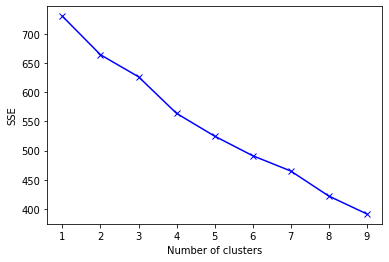

In [ ]:
#Generating Optimal cluster 
X = tfidf_matrix_head
SSE = [] 

K = range(1,10)
for k in K: 
    kmeans = KMeans(n_clusters = k, init='k-means++' )
    kmeans.fit(X) 
    SSE.append(kmeans.inertia_)

plt.plot(K, SSE, 'bx-') 
plt.xlabel('Number of clusters') 
plt.ylabel('SSE') 
plt.show()

In [ ]:
num_clusters = 8

#Run clustering algorithm
km = KMeans(n_clusters=num_clusters, init = 'k-means++', n_init=100)
km.fit(tfidf_matrix_head)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
ranks = []
for i in range(1, len(data_vector_headlines)+1):
    ranks.append(i)

In [ ]:
#final clusters
clusters = km.labels_.tolist()
Headlines_data = { 'rank': ranks, 'Headlines':data_vector_headlines , 'cluster': clusters }
frame = pd.DataFrame(complaints_data, index = [clusters] , columns = ['rank', 'cluster'])

#number of docs per cluster
frame['cluster'].value_counts()

0    875
4     90
1     75
7     61
3     60
2     55
5     53
6     39
Name: cluster, dtype: int64

**e) Provide a visualization of the generated clusters from the KMeans & Hierarchical clustering**

In [ ]:
#Displaying visualizations 
random_state = 0 

pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(tfidf_matrix_head.toarray())

reduced_cluster_centers = pca.transform(km.cluster_centers_)

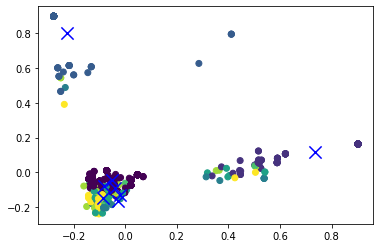

In [ ]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=km.predict(tfidf_matrix_head))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [ ]:
tv_head = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True, smooth_idf=True)
tv_matrix_head = tv_head.fit_transform(data_vector_headlines)
tv_matrix_head = tv_matrix_head.toarray()
vocab = tv_head.get_feature_names()
pd.DataFrame(np.round(tv_matrix_head, 2), columns=vocab)

,abandons,abate,aberdeen,ability,abroad,absent,absorb,accelerate,accelerates,accenture,access,account,accounting,accounts,accuse,accused,accuses,ackman,acknowledges,acknowledging,acquire,acquires,acquisition,across,action,actions,activism,activist,activists,activity,adam,add,additional,address,adds,adidas,adjusted,adjusting,administration,administrator,...,woolworths,words,work,worker,workers,workforce,working,works,world,worldwide,worried,worries,worry,worsens,worth,wrestle,writedown,wsj,wto,wwd,xiidra,year,years,yeezy,yet,yield,yields,york,youtube,yum,zeitung,zero,zomato,zone,zoom,zoox,zte,zuckerberg,zuercher,zynga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
1304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similarity_matrix_head = cosine_similarity(tv_matrix_head)
similarity_df_head = pd.DataFrame(similarity_matrix_head)
similarity_df_head

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307
0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.079071,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.087375,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.0,1.000000,0.101753,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.064858,0.000000,0.0,0.0,0.078919,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.066030,0.089390,0.0,0.0,0.070957,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.113142,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.0,0.101753,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.108093,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.000000,1.000000,0.059881,0.0,0.0,0.0,0.0,0.0,0.000000,0.040315,0.0,0.0,0.000000,0.0,0.138448,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.079789,0.0,0.063748,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.046707,0.0,0.0,0.000000,0.134561,0.0,0.0,0.0,0.054775,0.0,0.0,0.000000,0.0,0.000000,0.0,0.046900,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.084644,0.000000,0.126223,0.000000,0.000000,0.0,0.044413
4,0.0,0.000000,0.000000,0.059881,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.076304,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.066317,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0.0,0.000000,0.000000,0.126223,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.070151,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.154012,0.0,0.0,0.000000,0.000000,1.000000,0.069637,0.000000,0.0,0.000000
1304,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.086191,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.14551

In [ ]:
Z = linkage(similarity_matrix_head, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2','Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,641,700,0,2
1,105,191,0,2
2,77,79,0,2
3,1012,1102,0,2
4,664,697,0.165691,2
...,...,...,...,...
1302,2558,2609,6.30787,898
1303,2606,2610,6.71194,1193
1304,2569,2611,7.46777,1221
1305,2571,2612,7.99113,1275


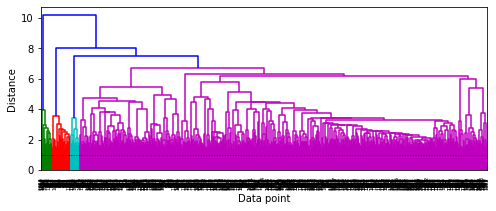

In [ ]:
plt.figure(figsize=(8, 3))
plt.title = ('Hierarchical Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

<H5 align="left"><b> Thank you </b></H5>
<H5 align="left"><b> Assignment -2 Part B: Clustering </b></H5>
<H5 align="left"><b> Prepared and Submitted By : Rahul Raj Sharma </b></H5>